In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Generate random input data to train on for the example

In [150]:
observations = 10000

xs=np.random.uniform(low=-10, high=10,size=(observations,1))
zs=np.random.uniform(-10,10,(observations,1))

inputs = np.column_stack((xs,zs))
print(inputs.shape)

(10000, 2)


Create the targets

In [151]:
noise = np.random.uniform(-1,1,(observations,1))

#we use a randomly chosen function for this example
targets = 13*xs + 7*zs -12 + noise

print(targets.shape)

(10000, 1)


Plot the training data

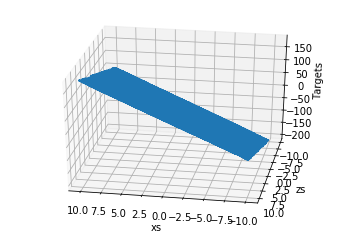

In [152]:
targets = targets.reshape(observations,)
fig = plt.figure()
ax = fig.add_subplot(111,projection = "3d")
ax.plot(xs, zs, targets)
ax.set_xlabel("xs")
ax.set_ylabel("zs")
ax.set_zlabel("Targets")
ax.view_init(azim=100)
plt.show()
targets = targets.reshape(observations,1)

Initial range for weights and biases, will be generated randomly

In [153]:
init_range = 0.1

weights = np.random.uniform(-init_range, init_range, size=(2,1))
biases = np.random.uniform(-init_range, init_range, size=1)
print(weights)
print(biases)

[[0.02691412]
 [0.07194534]]
[0.01161541]


Set a learning rate

In [154]:
learning_rate = 0.02

Train the model

In [157]:
for i in range(100):
    outputs = np.dot(inputs, weights) + biases
    deltas = outputs - targets
    
    loss = np.sum(deltas**2) / 2 / observations
    
    print(loss)
    
    deltas_scaled = deltas / observations
    
    weights = weights - learning_rate*np.dot(inputs.T, deltas_scaled)
    biases = biases - learning_rate*np.sum(deltas_scaled)

0.1912978512436185
0.19040995082720055
0.18955720680378804
0.18873822715695074
0.18795167498710888
0.18719626632918665
0.1864707680566718
0.1857739958686608
0.1851048123566151
0.18446212514765384
0.18384488512137254
0.18325208469725962
0.18268275618992844
0.18213597022946745
0.18161083424434182
0.18110649100436355
0.1806221172213502
0.18015692220519186
0.17971014657313422
0.1792810610101597
0.178868965078462
0.1784731860740486
0.178093077928625
0.177728020154953
0.17737741683396985
0.17704069564201022
0.1767173069165519
0.1764067227589434
0.17610843617266633
0.17582196023571628
0.17554682730575183
0.1752825882567182
0.17502881174569448
0.17478508350876965
0.17455100568480256
0.17432619616595335
0.17411028797393058
0.1739029286609397
0.17370377973434534
0.1735125161041211
0.17332882555216916
0.17315240822266043
0.1729829761325485
0.17282025270146809
0.17266397230024647
0.17251387981728963
0.17236973024214183
0.17223128826552833
0.17209832789523963
0.17197063208722113
0.17184799239127213

Print weights and biases and see if we have worked correctly

In [158]:
print(weights, biases)

[[12.99959392]
 [ 6.99918619]] [-11.97535601]


Plot last ouputs vs. targets

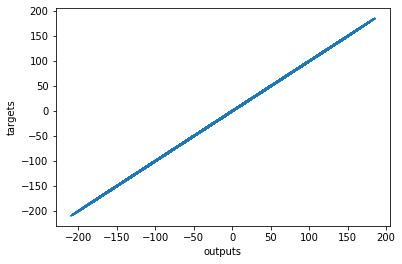

In [159]:
plt.plot(outputs, targets)
plt.xlabel("outputs")
plt.ylabel("targets")
plt.show()